In [204]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder



# <font color="Black">Reading Necessary CSV Files</font>

In [205]:
train_set = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
test_set = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e2/sample_submission.csv")
combined_data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# <font color="black">Finding Missing Values </font>

In [206]:
train_set.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [207]:
test_set.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [208]:
combined_data.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [209]:
train_set.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [210]:
test_set.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [211]:
combined_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <font color="Black">Merging Train and Original Dataset</font>


In [212]:
#This code merging 2 datasets and drops 'id' column.
temp = combined_data.query("stroke==1")
combined_data = (pd.concat([temp,train_set],axis=0)).drop(columns=["id"])
test_set = test_set.drop(columns=["id"])

In [213]:
combined_data.isnull().sum()


gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

- Some of bmi values contains null values so as far as not too many null values we can just delete it.

In [214]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15553 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15553 non-null  object 
 1   age                15553 non-null  float64
 2   hypertension       15553 non-null  int64  
 3   heart_disease      15553 non-null  int64  
 4   ever_married       15553 non-null  object 
 5   work_type          15553 non-null  object 
 6   Residence_type     15553 non-null  object 
 7   avg_glucose_level  15553 non-null  float64
 8   bmi                15513 non-null  float64
 9   smoking_status     15553 non-null  object 
 10  stroke             15553 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


- We check  dtypes our features and as you can see there are int64,object,float64 now lets see how can we handle.



# <font color="black">Separating Numericals and Categoricals to be able to Visualise</font>

In [215]:
numerical_variables = combined_data.select_dtypes(np.number).drop(columns=["stroke"])
categorical_variables = combined_data.select_dtypes("object")

numerical_variables_test = test_set.select_dtypes(np.number)
categorical_variables_test = test_set.select_dtypes("object")

# <font color="black">Pre Proccesing</font>
- Categorical variables were defined as numericals by their importance or situation.

In [216]:
categorical_variables.columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [217]:
categorical_variables["work_type"].value_counts()


Private          9901
children         2040
Self-employed    2004
Govt_job         1566
Never_worked       42
Name: work_type, dtype: int64

In [218]:
print(categorical_variables["gender"].unique())
print(categorical_variables["ever_married"].unique())
print(categorical_variables["work_type"].unique())
print(categorical_variables["Residence_type"].unique())
print(categorical_variables["smoking_status"].unique())

# Train dataset side
categorical_variables["gender"] = categorical_variables["gender"].replace("Other",2)
categorical_variables["gender"] = categorical_variables["gender"].replace("Male",1)
categorical_variables["gender"] = categorical_variables["gender"].replace("Female",0)

categorical_variables["ever_married"] = categorical_variables["ever_married"].replace("Yes",1)
categorical_variables["ever_married"] = categorical_variables["ever_married"].replace("No",0)

categorical_variables["work_type"] = categorical_variables["work_type"].replace("Never_worked",0)
categorical_variables["work_type"] = categorical_variables["work_type"].replace("children",1)
categorical_variables["work_type"] = categorical_variables["work_type"].replace("Private",2)
categorical_variables["work_type"] = categorical_variables["work_type"].replace("Self-employed",3)
categorical_variables["work_type"] = categorical_variables["work_type"].replace("Govt_job",4)

categorical_variables["Residence_type"] = categorical_variables["Residence_type"].replace("Urban",1)
categorical_variables["Residence_type"] = categorical_variables["Residence_type"].replace("Rural",0)

categorical_variables["smoking_status"] = categorical_variables["smoking_status"].replace("Unknown",0)
categorical_variables["smoking_status"] = categorical_variables["smoking_status"].replace("smokes",1)
categorical_variables["smoking_status"] = categorical_variables["smoking_status"].replace("formerly smoked",2)
categorical_variables["smoking_status"] = categorical_variables["smoking_status"].replace("never smoked",3)

# Test dataset side
categorical_variables_test["gender"] = categorical_variables_test["gender"].replace("Other",2)
categorical_variables_test["gender"] = categorical_variables_test["gender"].replace("Male",1)
categorical_variables_test["gender"] = categorical_variables_test["gender"].replace("Female",0)

categorical_variables_test["ever_married"] = categorical_variables_test["ever_married"].replace("Yes",1)
categorical_variables_test["ever_married"] = categorical_variables_test["ever_married"].replace("No",0)

categorical_variables_test["work_type"] = categorical_variables_test["work_type"].replace("Never_worked",0)
categorical_variables_test["work_type"] = categorical_variables_test["work_type"].replace("children",1)
categorical_variables_test["work_type"] = categorical_variables_test["work_type"].replace("Private",2)
categorical_variables_test["work_type"] = categorical_variables_test["work_type"].replace("Self-employed",3)
categorical_variables_test["work_type"] = categorical_variables_test["work_type"].replace("Govt_job",4)

categorical_variables_test["Residence_type"] = categorical_variables_test["Residence_type"].replace("Urban",1)
categorical_variables_test["Residence_type"] = categorical_variables_test["Residence_type"].replace("Rural",0)

categorical_variables_test["smoking_status"] = categorical_variables_test["smoking_status"].replace("Unknown",0)
categorical_variables_test["smoking_status"] = categorical_variables_test["smoking_status"].replace("smokes",1)
categorical_variables_test["smoking_status"] = categorical_variables_test["smoking_status"].replace("formerly smoked",2)
categorical_variables_test["smoking_status"] = categorical_variables_test["smoking_status"].replace("never smoked",3)

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [219]:
combined_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [220]:
combined_data[list(categorical_variables.columns)] = categorical_variables[list(categorical_variables.columns)]


In [221]:
test_set[list(categorical_variables_test.columns)] = categorical_variables_test[list(categorical_variables_test.columns)]


In [222]:
# \ is used as a line break so the if condition can be written in the next line.

combined_data["bmi"].fillna(combined_data["bmi"].mean(),inplace=True)
test_set.fillna(test_set["bmi"].mean(),inplace=True)

combined_data["risk_factor"] = combined_data[[
"age","avg_glucose_level","bmi",
"heart_disease","hypertension","smoking_status"
]].apply(
lambda x:0+(1 if x.age >= 45 else 0) + \
        (1 if x.bmi > 24.99 else 0) + \
        (1 if x.avg_glucose_level > 99 else 0) + \
        (1 if x.heart_disease == 1 else 0) + \
        (1 if x.hypertension == 1 else 0) + \
        (1 if x.smoking_status in [2,3] else 0),
        axis=1
)

test_set["risk_factor"] = test_set[[
"age","avg_glucose_level","bmi",
"heart_disease","hypertension","smoking_status"
]].apply(
lambda y:0+(1 if y.age >= 45 else 0) + \
        (1 if y.bmi > 24.99 else 0) + \
        (1 if y.avg_glucose_level > 99 else 0) + \
        (1 if y.heart_disease == 1 else 0) + \
        (1 if y.hypertension == 1 else 0) + \
        (1 if y.smoking_status in [2,3] else 0),
        axis=1
)

In [223]:
numerical_variables


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
...,...,...,...,...,...
15299,22.0,0,0,72.63,19.5
15300,46.0,1,0,101.19,32.1
15301,75.0,0,0,87.69,26.2
15302,46.0,0,0,101.13,22.5


In [224]:
combined_data["obese_category1"] = np.where(combined_data.bmi>30,1,0)
combined_data["obese_category2"] = np.where(combined_data.bmi>40,1,0)
test_set["obese_category1"] = np.where(test_set.bmi>30,1,0)
test_set["obese_category3"] = np.where(test_set.bmi>40,1,0)

In [225]:
combined_data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_factor,obese_category1,obese_category2
0,1,67.0,0,1,1,2,1,228.69,36.600000,2,1,5,1,0
1,0,61.0,0,0,1,3,0,202.21,28.144497,3,1,4,0,0
2,1,80.0,0,1,1,2,0,105.92,32.500000,3,1,5,1,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,1,1,3,1,0
4,0,79.0,1,0,1,3,0,174.12,24.000000,3,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,0,22.0,0,0,0,4,1,72.63,19.500000,3,0,1,0,0
15300,0,46.0,1,0,1,2,1,101.19,32.100000,3,0,5,1,0
15301,0,75.0,0,0,1,3,1,87.69,26.200000,3,0,3,0,0
15302,1,46.0,0,0,1,2,0,101.13,22.500000,0,0,2,0,0


# <font color="black">Data Visulation</font>


# <font color="Black"> HeatMap </font>
- Using Heatmaps now we can visualize and explore relationships, patterns, and variations in the data. 

<AxesSubplot: >

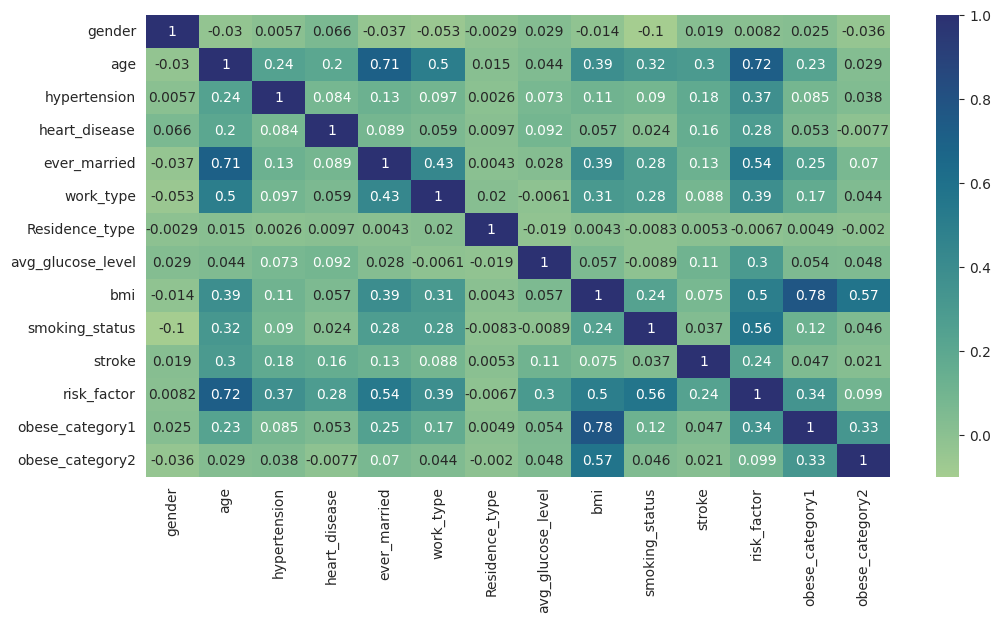

In [226]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
combined_data['bmi'] = imp.fit_transform(combined_data[["bmi"]])
enc_col =["gender", "work_type",'ever_married',"Residence_type","smoking_status","avg_glucose_level"]
enc = OrdinalEncoder()
combined_data[enc_col] = enc.fit_transform(combined_data[enc_col])
plt.figure(figsize=(12,6))
sns.heatmap(data = combined_data.corr(),annot=True,
            cmap="crest",fmt=".2g")

- We can easily check our data's gender distribution using countplot

 


<AxesSubplot: xlabel='gender', ylabel='count'>

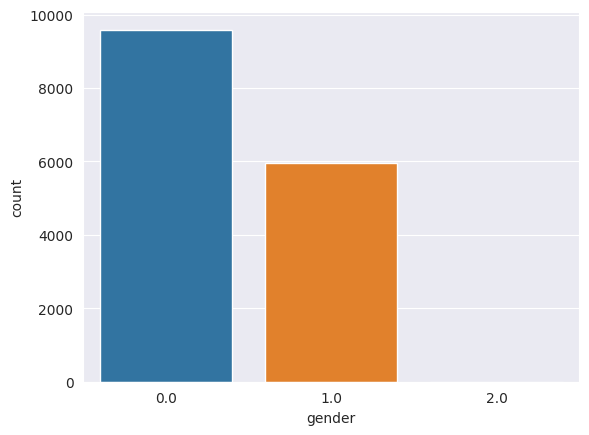

In [227]:
sns.countplot(x="gender",data=combined_data)


- Using dot plot we can see the relations between having stroke and features

<AxesSubplot: xlabel='stroke', ylabel='hypertension'>

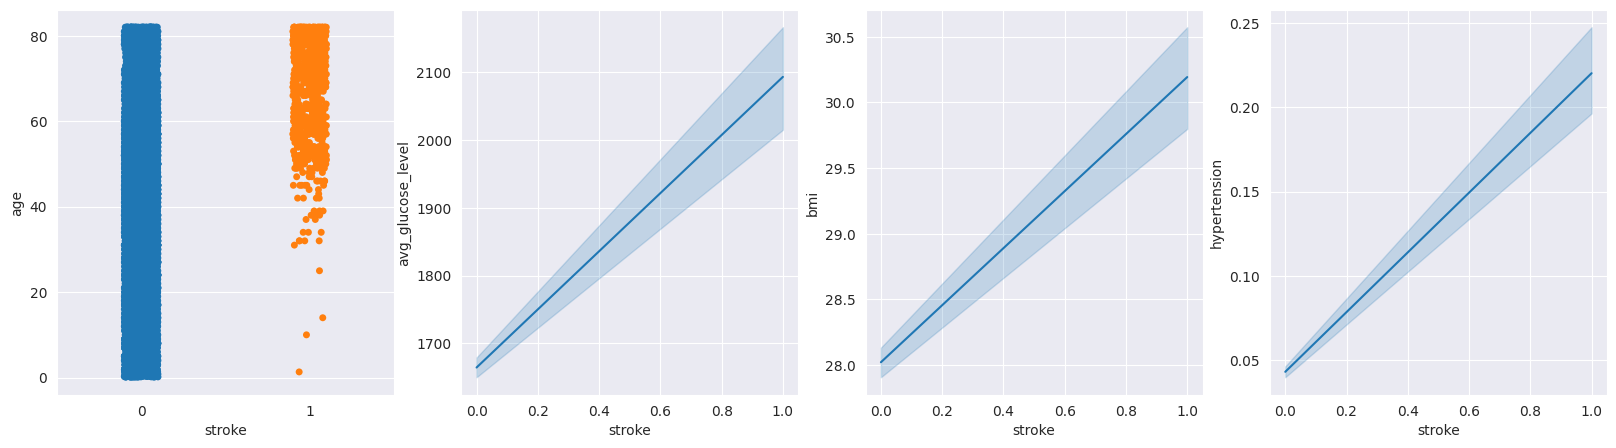

In [228]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(20, 5))
plt.subplot(1, 4,1)
sns.stripplot(data=combined_data, x='stroke',y='age',palette="tab10")
plt.subplot(1, 4,2)
sns.lineplot(data=combined_data, x='stroke',y='avg_glucose_level',palette="blend:#7AB,#EDA")
plt.subplot(1, 4,3)
sns.lineplot(data=combined_data, x='stroke',y='bmi',palette="blend:#7AB,#EDA")
plt.subplot(1, 4,4)
sns.lineplot(data=combined_data, x='stroke',y='hypertension',palette="blend:#7AB,#EDA")

- Using bloxpot we can basically check summary, outliers etc.
   

<AxesSubplot: xlabel='bmi'>

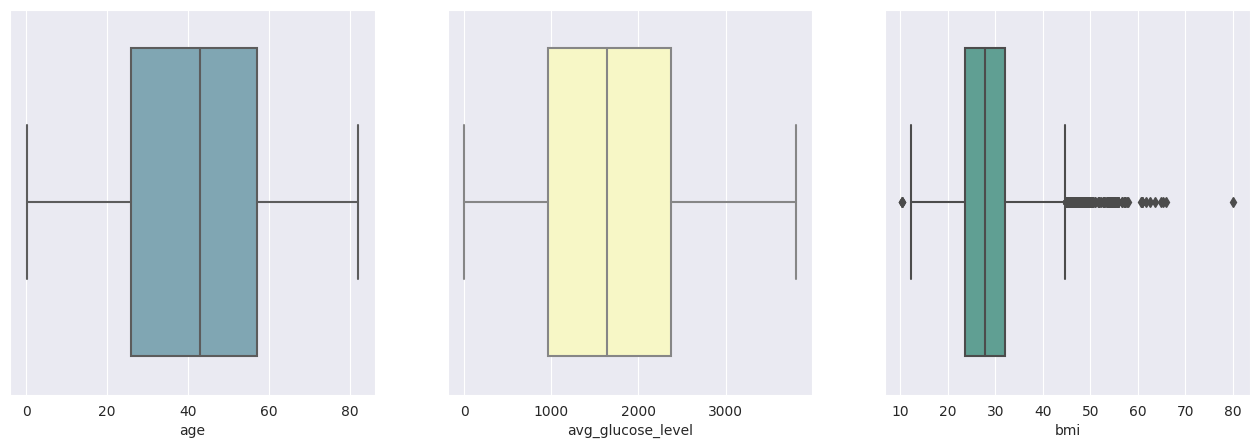

In [229]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.boxplot(x=combined_data['age'],palette="blend:#7AB,#EDA")
plt.subplot(1, 3,2)
sns.boxplot(x=combined_data['avg_glucose_level'],palette="Spectral")
plt.subplot(1, 3,3)
sns.boxplot(x=combined_data['bmi'],palette="dark:#5A9_r")

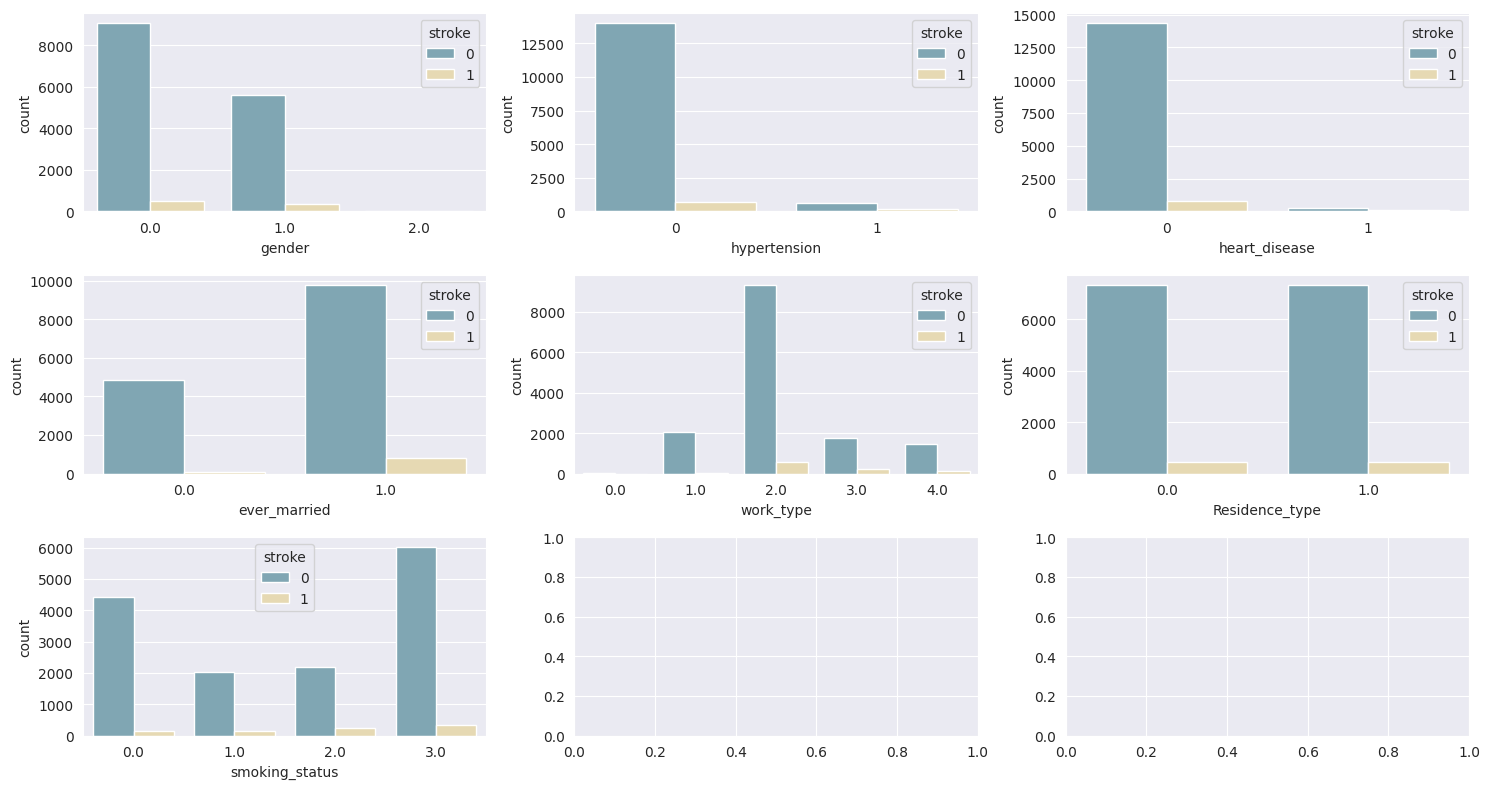

In [231]:
# plots between categoical features and target
ncols =3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(15, 8))

for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=combined_data, x=feature, hue='stroke',ax =ax[row,col],palette="blend:#7AB,#EDA")
    
plt.tight_layout()    

- More Plots. Why Not ?

<AxesSubplot: xlabel='hypertension', ylabel='age'>

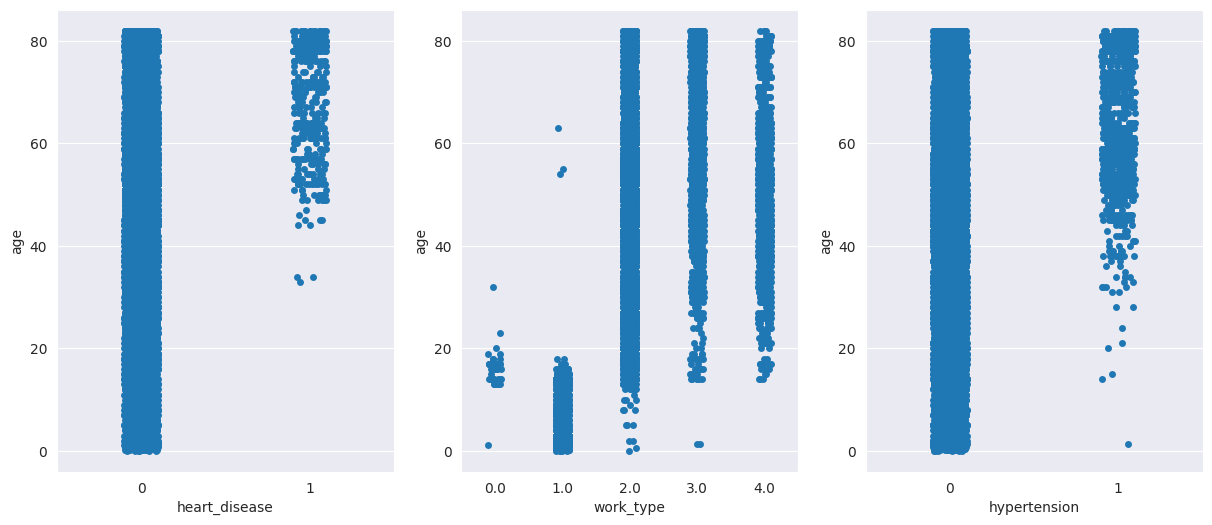

In [232]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4,1)
sns.stripplot(data=combined_data,x='heart_disease',y='age')
plt.subplot(1, 4,2)
sns.stripplot(data=combined_data,x='work_type',y='age')
plt.subplot(1, 4,3)
sns.stripplot(data=combined_data,x='hypertension',y='age')

<AxesSubplot: xlabel='avg_glucose_level', ylabel='bmi'>

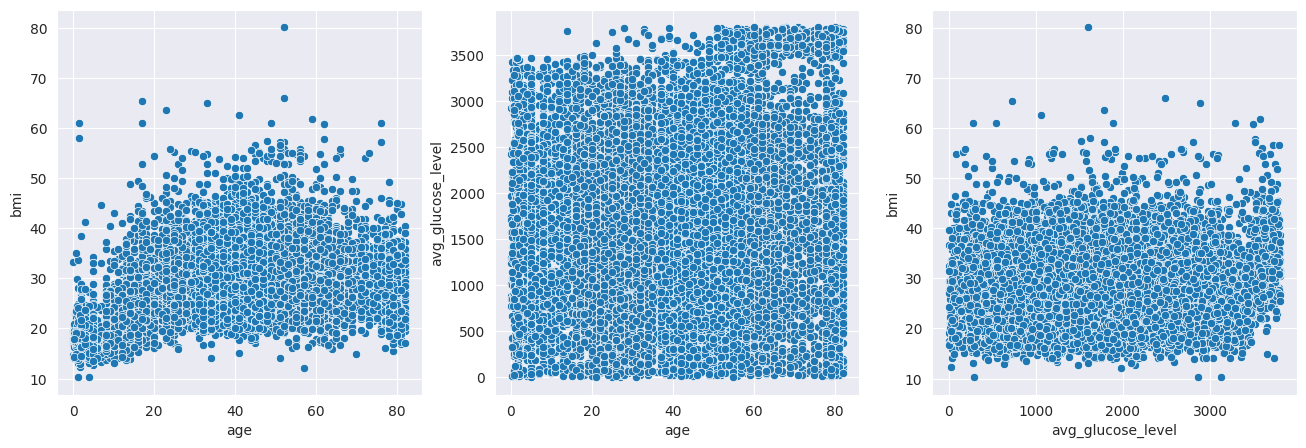

In [233]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.scatterplot(data=combined_data, x='age',y='bmi')
plt.subplot(1, 3,2)
sns.scatterplot(data=combined_data, x='age',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.scatterplot(data=combined_data, x='avg_glucose_level',y='bmi')

In [ ]:
combined_data.describe()


# <font color="black"> Creating the  Model  </font>


In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

fold : 1
score : 0.8917792181283916
-----------------------------------------------------
fold : 2
score : 0.8876674539259718
-----------------------------------------------------
fold : 3
score : 0.9141919622115534
-----------------------------------------------------
fold : 4
score : 0.8945184204003223
-----------------------------------------------------
fold : 5
score : 0.9008276786267584
-----------------------------------------------------
Score over 5-folds : 0.8977969466585994


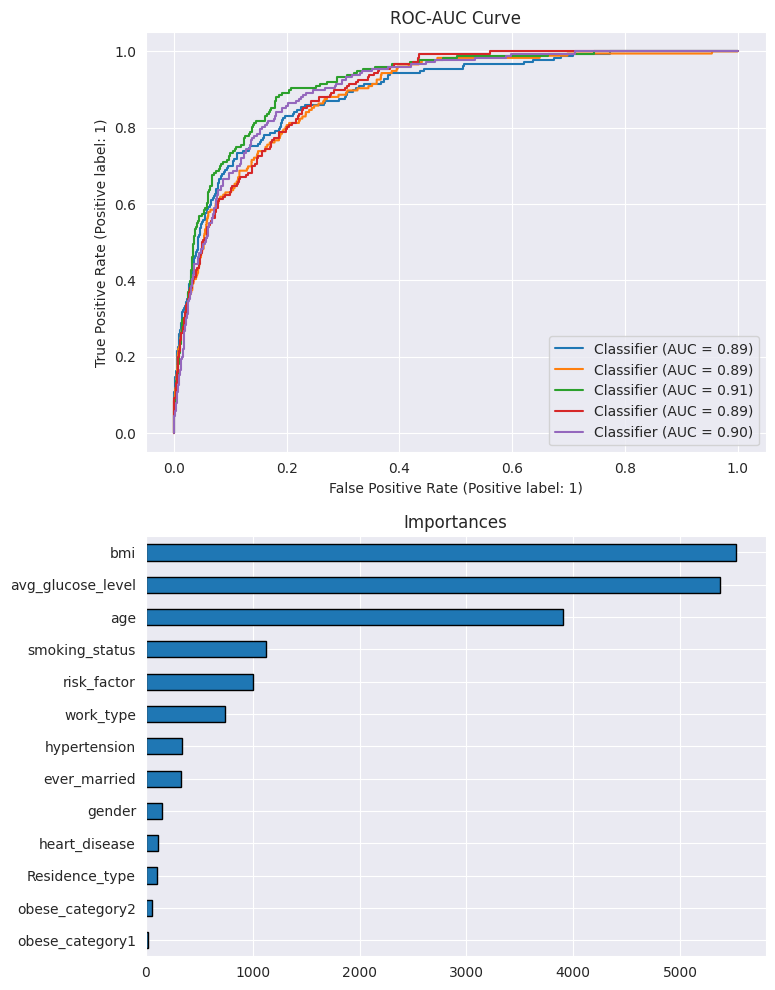

In [237]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

# split into X, Y
X = combined_data.drop(['stroke'], axis=1).copy()
Y = combined_data['stroke'].copy()
X_test = test_set.copy()

lgb_cv_scores = list()
lgb_importances = list()
lgb_preds_test = list()

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, Y)):
    
    # split into train, valid
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    Y_train, Y_valid = Y.iloc[train_index], Y.iloc[valid_index]

    # model
    lgb_md = LGBMClassifier(n_estimators = 1000,
                            max_depth = 7,
                            learning_rate = 0.01,
                            num_leaves = 20,
                            reg_alpha = 3,
                            reg_lambda = 3,
                            subsample = 0.7,
                            colsample_bytree = 0.7)
    
    # train
    lgb_md.fit(X_train, Y_train)

    # importances
    lgb_importances.append(lgb_md.feature_importances_)
    
    # validation
    lgb_pred_valid = lgb_md.predict_proba(X_valid)[:, 1]
    lgb_cv_scores.append(roc_auc_score(Y_valid, lgb_pred_valid))
    RocCurveDisplay.from_predictions(Y_valid, lgb_pred_valid,  ax=ax[0])

    # test
    lgb_pred_test = lgb_md.predict_proba(X_test)[:, 1]
    lgb_preds_test.append(lgb_pred_test)

    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {lgb_cv_scores[-1]}')
    print('-----------------------------------------------------')

# importances
df_importances = pd.DataFrame(lgb_importances, columns=X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.5, ax=ax[1],  edgecolor='black')

# folds score
lgb_cv_score = np.mean(lgb_cv_scores)    
print(f'Score over 5-folds : {lgb_cv_score}')

In [ ]:
predictions = pd.DataFrame(lgb_preds_test).apply(np.mean, axis = 0)
sample_submission['stroke'] = predictions
sample_submission.to_csv('/kaggle/working/submission.csv', index = False)